# Tarea 1

### 1.a Generador de catálogos

In [202]:
#Se importan las librerías y funciones a utilizar

import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.visualization import make_lupton_rgb as mrgb
from photutils.segmentation import detect_sources, deblend_sources,SourceCatalog
from photutils.isophote import EllipseGeometry, Ellipse
from photutils.aperture import EllipticalAperture
import warnings
warnings.filterwarnings('ignore')

#Se ha utilizado una región del cielo del DECaLS de coordenadas RA=219.0010 y DEC=28.4525
target_url = 'https://www.legacysurvey.org/viewer/cutout.fits?ra=219.0010&dec=28.4525&layer=ls-dr9&pixscale=1.20&zoom=10'
fit = fits.open(target_url) 
'''
Funciones para abrir la imagen de la dirección url y extraer su información.
'''
data = fit[0].data

In [158]:

threshold = 1.5 * np.mean(data)
'''
Se establece un valor para el umbral de detección (threshold), de manera que nuestra imagen pueda ser segmentada. 
Luego, se crean las variables de segmentación con la función detect_sources, cuyo objetivo es detectar fuentes 
por encima del valor del umbral establecido. 

En este período de segmentación, las fuentes superpuestas se consideran como fuentes únicas.
'''
segment_map = detect_sources(np.mean(data,axis=0), threshold, npixels=10) 
segment_map_g = detect_sources(data[0], threshold, npixels=10)
segment_map_r = detect_sources(data[1], threshold, npixels=10)
segment_map_z = detect_sources(data[2], threshold, npixels=10)

In [159]:
#Se descomponen de fuentes superpuestas en la región del cielo escogida a través de la función "deblend_sources".
deblend_map_g = deblend_sources(data[0],segment_map_g,nlevels=32,npixels=7,progress_bar=False)
deblend_map_r = deblend_sources(data[1],segment_map_r,nlevels=32,npixels=7,progress_bar=False)
deblend_map_z = deblend_sources(data[2],segment_map_z,nlevels=32,npixels=7,progress_bar=False)

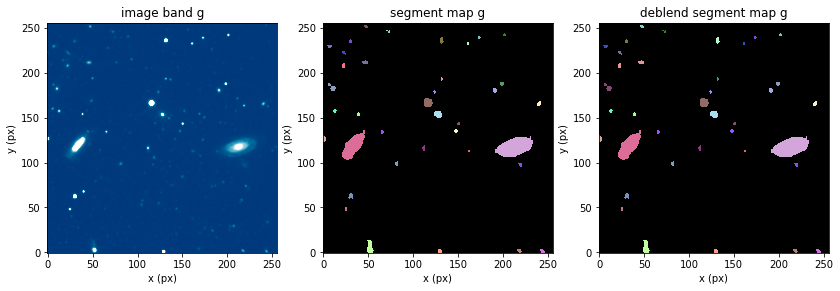

In [203]:
#Gráfico de la región en banda g, incluyendo su segmentación de fuentes "únicas" y su segmentación de fuentes 
#desompuestas.
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,10))
ax1.set(title='image band g', xlabel='x (px)',ylabel='y (px)')
ax1.imshow(data[0],origin="lower",vmax=np.mean(data[0])+2*np.std(data[0]), vmin=np.mean(data[0])-2*np.std(data[0]), 
           cmap='ocean')
ax2.set(title='segment map g', xlabel='x (px)', ylabel='y (px)')
ax2.imshow(segment_map_g,origin="lower",cmap=segment_map_g.cmap,interpolation='nearest')
ax3.set(title='deblend segment map g', xlabel='x (px)', ylabel='y (px)')
ax3.imshow(deblend_map_g,origin="lower",cmap=segment_map_g.cmap,interpolation='nearest')
plt.show()

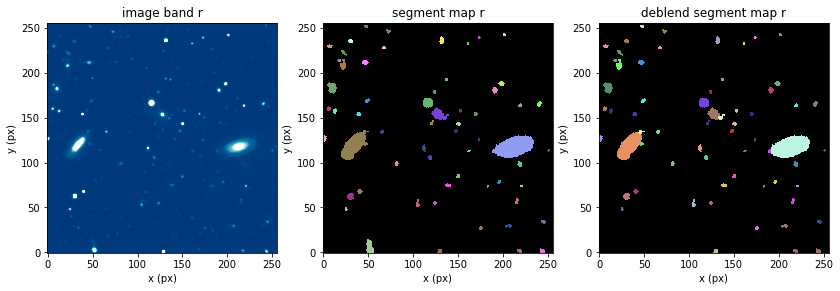

In [166]:
#Gráfico de la región en banda r, incluyendo su segmentación de fuentes"únicas" y su segmentación de fuentes 
#desompuestas.
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,10))
ax1.set(title='image band r', xlabel='x (px)',ylabel='y (px)')
ax1.imshow(data[1],origin="lower",vmax=np.mean(data[1])+2*np.std(data[1]), vmin=np.mean(data[1])-2*np.std(data[1]), 
           cmap='ocean')
ax2.set(title='segment map r', xlabel='x (px)', ylabel='y (px)')
ax2.imshow(segment_map_r,origin="lower",cmap=segment_map_r.cmap,interpolation='nearest')
ax3.set(title='deblend segment map r', xlabel='x (px)', ylabel='y (px)')
ax3.imshow(deblend_map_r,origin="lower",cmap=segment_map_r.cmap,interpolation='nearest')
plt.show()

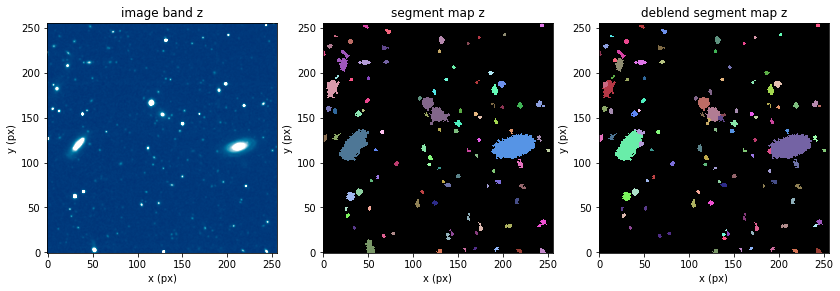

In [167]:
#Gráfico de la región en banda z, incluyendo su segmentación de fuentes "únicas" y su segmentación de fuentes 
#desompuestas.
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,10))
ax1.set(title='image band z', xlabel='x (px)',ylabel='y (px)')
ax1.imshow(data[2],origin="lower",vmax=np.mean(data[2])+2*np.std(data[2]), vmin=np.mean(data[2])-2*np.std(data[2]), 
           cmap='ocean')
ax2.set(title='segment map z', xlabel='x (px)', ylabel='y (px)')
ax2.imshow(segment_map_z,origin="lower",cmap=segment_map_z.cmap,interpolation='nearest')
ax3.set(title='deblend segment map z', xlabel='x (px)', ylabel='y (px)')
ax3.imshow(deblend_map_z,origin="lower",cmap=segment_map_z.cmap,interpolation='nearest')
plt.show()

In [168]:
#Se genera un catálogo con los datos de fuentes descompuestas para cada banda.
cat_g = SourceCatalog(data[0], deblend_map_g)
cat_r = SourceCatalog(data[1], deblend_map_r)
cat_z = SourceCatalog(data[2], deblend_map_z)

In [169]:
#Los datos del catálogo generado se organizan en tablas de información para cada banda.
tbl_g = cat_g.to_table()
tbl_r = cat_r.to_table()
tbl_z = cat_z.to_table()

In [170]:
tbl_g

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,52.22242196650229,3.499022445495662,None,49,56,0,14,79.0,2.4117068176864063,1.1855251821209032,-80.48779504373849,0.8708374886041426,0.006595175713300705,0.46492838859558105,0.0,4.068797915708274,nan,4.05902654578867,nan
2,129.28677873192387,0.9650354421934098,None,128,132,0,3,17.0,0.7469412035137214,0.725137872490022,-39.185599222563255,0.23985047174239718,0.00657839747145772,1.0888948440551758,0.0,4.195313005242497,nan,4.1798811790409385,nan
3,217.6653222381995,2.034316261928717,None,216,220,0,4,16.0,1.1535457281200767,0.6902683016715622,-41.41005436617332,0.8012062198226707,0.00679479306563735,0.055219851434230804,0.0,0.35251447884365916,nan,0.383803584054242,nan
4,243.92843078987696,1.440590071527095,None,242,246,0,4,16.0,1.1994220643912665,0.717481608907077,-49.68773332862489,0.801354726682775,0.006752589251846075,0.0508849062025547,0.0,0.3406624807976186,nan,0.377150392943211,nan
5,25.048104549241213,48.3231675485282,None,24,26,47,50,12.0,0.770507365657553,0.6684443341107699,-84.85357261570879,0.49737109856461137,0.007396846078336239,0.1511746495962143,0.0,0.5898470780812204,nan,0.6052537273821538,nan
6,30.525524768028852,62.66838911889154,None,28,32,60,66,25.0,0.794996882426718,0.721415506955943,-87.26522907827115,0.4201720768967557,0.007206670939922333,2.530358076095581,0.0,12.233511390164495,nan,12.152790936721658,nan
7,219.46021367744376,97.69853067548428,None,217,221,96,99,16.0,1.2707677587595139,0.940423643112924,-33.37173029855037,0.6725588138621221,0.006673134863376617,0.010121063329279423,0.0,0.1327005405910313,nan,0.5553596487188417,nan
8,81.62708311449789,98.89471974369569,None,80,83,97,101,16.0,1.0630434914472515,0.8431539375040034,59.586948116692874,0.6090251200238919,0.00652216374874115,0.036133505403995514,0.0,0.27213259879499674,nan,0.34296667570504213,nan


In [171]:
tbl_r

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,52.194392271134056,3.5107442193387017,None,48,56,0,15,104.0,2.3726830264382555,1.2652198729202948,-77.93899936787015,0.8459612512356287,0.00656016543507576,0.8854693174362183,0.0,7.702928499784321,nan,7.537887871571223,nan
2,129.26965484314587,1.028576455745483,None,127,132,0,3,20.0,0.7701085166889999,0.7410930889975611,2.2409643152737506,0.27190911423027175,0.007138894405215979,1.2644307613372803,0.0,4.883196455892175,nan,4.860161963983027,nan
3,217.6825782483589,2.0813643995700866,None,216,220,0,4,20.0,1.205847434862652,0.7531387535657332,-38.76253070806666,0.7809670926587328,0.006594345439225435,0.09129239618778229,0.0,0.6273059374652803,nan,0.6660510262135612,nan
4,243.8452187570126,1.531711080620467,None,241,246,0,5,24.0,1.2592513363246218,0.8276787291155051,-50.61076465911908,0.7536478475998368,0.006542326882481575,0.1748666763305664,0.0,1.2045203801244497,nan,1.2375717044615338,nan
5,175.39261262178272,27.3180232483847,None,174,177,26,29,13.0,0.9090140880199872,0.7816250593829392,70.27905037032332,0.5105295205228972,0.007132415194064379,0.037196509540081024,0.0,0.25286772148683667,nan,0.32901753804821665,nan
6,206.6945784918785,29.600047520827736,None,203,209,28,31,20.0,1.5283751568349693,0.7799071714327117,4.383182431875718,0.8600052609227843,0.00749396625906229,0.07420605421066284,0.0,0.48159435018897057,nan,0.602545531050465,nan
7,244.9716273372052,34.2110910517491,None,243,247,32,36,21.0,1.0302954002213847,0.8918199595902533,-31.39180720924286,0.5007423712275033,0.006819778587669134,0.09211944043636322,0.0,0.535354953724891,nan,0.6412120354469715,nan
8,25.071957884545448,48.40608881850164,None,24,27,47,50,13.0,0.7636055258086915,0.7009684397737243,-87.36016988030799,0.39664534807982943,0.006995180156081915,0.1684419810771942,0.0,0.7013402697630227,nan,0.718899585898155,nan


In [172]:
tbl_z

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,52.22637298561775,3.4689771822827122,None,47,57,0,15,116.0,2.2598892759567386,1.2431233303786207,-77.47655269328209,0.8351109627900809,0.006514750886708498,1.671204686164856,0.0,12.650783505290747,nan,12.278966219303479,nan
2,129.26430910483856,0.999107013370447,None,126,132,0,3,21.0,0.7532564630512374,0.6990011444036113,3.7534105139247522,0.37264913943547195,0.006562891416251659,1.4054418802261353,0.0,4.906687525101006,nan,4.866160178886865,nan
3,217.62794555625095,2.1242437106200867,None,215,220,0,4,22.0,1.2231335733096396,0.721686307768748,-36.43119817204473,0.8073808407172592,0.00687693664804101,0.14889605343341827,0.0,0.9495865465141833,nan,0.9801093381019161,nan
4,243.86185290894468,1.5437194040932742,None,241,247,0,5,27.0,1.3062950716760997,0.7950341107486432,-50.55565798279632,0.7934637190828764,0.009774231351912022,0.41736793518066406,0.0,2.6371868196874857,nan,2.6575831769777984,nan
5,157.28195441594082,3.804560947483782,None,156,159,1,5,11.0,1.1781916398609682,0.7559216852330211,-61.19452023912403,0.7670437092857274,0.006653323769569397,0.018176350742578506,0.0,0.10296870768070221,nan,0.27366130729842636,nan
6,193.009342643604,4.088538192985823,None,190,195,1,6,18.0,1.5721803948600281,1.0053629540763018,51.95884973283466,0.7688156497589776,0.00678356783464551,0.022059859707951546,0.0,0.17686418583616614,nan,0.41075219962202314,nan
7,168.61432876126273,4.4216543617087085,None,167,170,3,6,13.0,1.0792820227382574,0.7445371039235485,57.8174675462758,0.7239572746681876,0.007687800098210573,0.024345410987734795,0.0,0.18444217229261994,nan,0.38656817432651214,nan
8,67.16549522015401,18.435967140039317,None,66,69,17,20,12.0,0.9299480594614591,0.6925781875029063,-59.38753916651007,0.6673443235851181,0.007496235426515341,0.0570785291492939,0.0,0.30571400141343474,nan,0.3521202483851719,nan


### 1.b Imagen del cielo en RGB

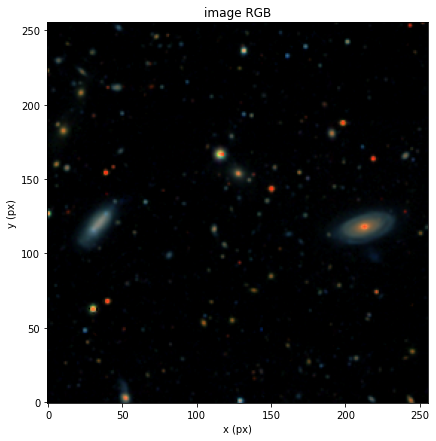

In [174]:
#Con la función "make_lupton_rgb" como "mrgb", se genera la imagen rgb de la región del cielo escogida.
rgb = mrgb(data[2]**1.25,data[1],data[0]**0.85,stretch=0.1,Q=10)

plt.figure(figsize=(7,7))
plt.xlabel('x (px)')
plt.ylabel('y (px)')
plt.title('image RGB')
plt.imshow(rgb,origin='lower')
plt.show()

### 1.c Orientaciones y tamaños de cada fuente

In [126]:
#Se define el valor para el umbral de detección, y se genera un mapa segmentado de la región.
threshold = 1.5 * np.mean(data)
segment_map = detect_sources(np.mean(data,axis=0), threshold, npixels=10)

In [127]:
#Catálogo general

deblend_map_gral = deblend_sources(np.mean(data,axis=0),segment_map,nlevels=32,npixels=7,progress_bar=False)
'''
Para graficar las orientaciones y tamaños de cada fuente, se necesita un catálogo general, es decir, con el mismo
largo para las tres bandas, pues de lo contrario, las orientaciones y tamaños no podrían graficarse en una única 
imagen rgb. 
Para ello se necesita una imagen segmentada de fuentes descompuestas reducida (de las tres bandas), la cual 
obtenemos a través del cálculo del promedio estadístico de sus píxeles. 
'''
cat_gral = SourceCatalog(np.mean(data,axis=0), deblend_map_gral) #Se crea el catálogo general
tbl_gral = cat_gral.to_table()

In [175]:
#Se crea el catálogo general para cada banda, considerando la nueva función general de descomposición de fuentes. 
cat_gral_g = SourceCatalog(data[0], deblend_map_gral)
cat_gral_r = SourceCatalog(data[1], deblend_map_gral)
cat_gral_z = SourceCatalog(data[2], deblend_map_gral)

In [177]:
#Por consiguiente, las tablas generales para cada banda.
tbl_gral_g = cat_gral_g.to_table()
tbl_gral_r = cat_gral_r.to_table()
tbl_gral_z = cat_gral_z.to_table()

In [178]:
tbl_gral_g

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,52.19648429270486,3.576371596188521,None,48,56,0,14,98.0,2.5256158612562087,1.250591902254739,-78.64907086589395,0.8688000093082583,0.0035824214573949575,0.46492838859558105,0.0,4.161942027742043,nan,4.098658954134089,nan
2,129.29276633304897,0.9692476676096012,None,128,132,0,3,19.0,0.7487083397368242,0.7356856935870294,-23.69223127555214,0.18569984847044013,0.00557590601965785,1.0888948440551758,0.0,4.206760738044977,nan,4.1821737061171405,nan
3,217.72384691614718,2.038164493635393,None,216,220,0,4,19.0,1.194430481666088,0.7239750076692862,-40.298129287094305,0.7953688703947789,0.003257941687479615,0.055219851434230804,0.0,0.3652505746576935,nan,0.3853623258445784,nan
4,243.8905699283137,1.5374700375689987,None,242,246,0,5,23.0,1.2660022257517223,0.8164021267659248,-51.933066743130134,0.7642954273721024,0.001573385437950492,0.0508849062025547,0.0,0.36711386730894446,nan,0.37844600698376457,nan
5,168.64773383425592,4.194968274279662,None,167,170,3,6,10.0,0.8558964197641331,0.7283597483949352,45.13900391716159,0.5251810324323547,0.003594029229134321,0.013445685617625713,0.0,0.0796951106749475,nan,0.12213243264603355,nan
6,175.40153797157578,27.273637931879914,None,174,177,26,29,14.0,0.9149882121536156,0.8409122673740251,80.28509597429604,0.3941604538155671,0.0014836994232609868,0.008749615401029587,0.0,0.06235876982100308,nan,0.09694971998002785,nan
7,34.21462422547846,27.92985332729689,None,33,36,27,29,10.0,0.8001821778369435,0.6869532747861852,-14.09956765448383,0.5128201002751086,0.0016445195069536567,0.009041010402143002,0.0,0.040365401771850884,nan,0.05596451126819306,nan
8,206.4698391236583,29.50025776768005,None,203,209,28,31,22.0,1.70350639757702,0.7950987266087929,7.016232997391803,0.8843932937129092,0.003325748723000288,0.03342876210808754,0.0,0.24190776934847236,nan,0.3394118954273545,nan


In [179]:
tbl_gral_r

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,52.20155837627907,3.4742790159647985,None,48,56,0,14,98.0,2.2933263459096787,1.2506459500662743,-77.97582386964392,0.8382139858892637,0.006809582002460957,0.8854693174362183,0.0,7.6609586966224015,nan,7.5067961826281735,nan
2,129.27330600872176,1.0302311139234526,None,128,132,0,3,19.0,0.7653535092464179,0.7405084634239439,-3.138879359481377,0.25272628087134746,0.007138894405215979,1.2644307613372803,0.0,4.875353535171598,nan,4.859222869959355,nan
3,217.70147449396535,2.093508694971659,None,216,220,0,4,19.0,1.210793060745955,0.7297499045495122,-39.60209412211932,0.7979647893800955,0.006594345439225435,0.09129239618778229,0.0,0.6203391994349658,nan,0.6655198839886257,nan
4,243.8607568973902,1.5291536888738202,None,242,246,0,5,23.0,1.2526560078857354,0.8175358859662022,-52.05102553981374,0.7576664554372162,0.007187520619481802,0.1748666763305664,0.0,1.1979780532419682,nan,1.2359052035662332,nan
5,168.62396382433616,4.221937180210407,None,167,170,3,6,10.0,0.8709844353600593,0.7250799772628729,42.16559477505617,0.5540501718662713,0.005947691388428211,0.019508304074406624,0.0,0.12001980282366276,nan,0.20756282139308177,nan
6,175.42878008626636,27.288366701574287,None,174,177,26,29,14.0,0.9081587422350179,0.8216985324903725,82.13442130027742,0.42584495897293634,0.0058206901885569096,0.037196509540081024,0.0,0.2586884116753936,nan,0.3302416533597898,nan
7,34.2164073955987,27.928920865938952,None,33,36,27,29,10.0,0.7723251596208776,0.6909952617631241,-11.358133930646053,0.4466780867977233,0.006023020949214697,0.04462750628590584,0.0,0.19288200652226806,nan,0.22093443724907819,nan
8,206.63993441543113,29.56055341277935,None,203,209,28,31,22.0,1.570756102312922,0.799616475338779,6.760417005356297,0.8607282595721139,0.006015836261212826,0.07420605421066284,0.0,0.4937824234366417,nan,0.6180315842365869,nan


In [180]:
tbl_gral_z

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,52.213575701267864,3.41864210948699,None,48,56,0,14,98.0,2.169749393632261,1.187286879125263,-77.42507324760913,0.8370018843988186,0.00764100719243288,1.671204686164856,0.0,12.508223244920373,nan,12.203030554474479,nan
2,129.27220842650266,1.0006234819317357,None,128,132,0,3,19.0,0.739145719348415,0.6991287829846657,1.7105148057819908,0.32457326399097713,0.006562891416251659,1.4054418802261353,0.0,4.892571205738932,nan,4.86336001511127,nan
3,217.68747984031472,2.1116747670753373,None,216,220,0,4,19.0,1.1766426137025623,0.7030548143777922,-38.70175248961605,0.8018620379505428,0.009714873507618904,0.14889605343341827,0.0,0.9255133690312505,nan,0.9766493656050674,nan
4,243.87850340345076,1.518017853043648,None,242,246,0,5,23.0,1.246905959881878,0.7845862487240847,-51.99032860699985,0.7772219992793368,0.011950039304792881,0.41736793518066406,0.0,2.5940714813768864,nan,2.6479562561838046,nan
5,168.64690595736593,4.290948504141872,None,167,170,3,6,10.0,0.90498949393158,0.7053350153330075,59.00217338769506,0.6265456113559328,0.007907520048320293,0.024345410987734795,0.0,0.15684144012629986,nan,0.3700700646992063,nan
6,175.5071629584524,27.30158899795032,None,174,177,26,29,14.0,0.8824962901045524,0.7853730242524188,-81.47335930091752,0.45606816658371235,0.01402368862181902,0.09695205092430115,0.0,0.5766013637185097,nan,0.7031626572524285,nan
7,34.237464991836525,27.909231180093723,None,33,36,27,29,10.0,0.747619866774607,0.6785199705792174,-8.817041449805062,0.4198932756386819,0.013872548006474972,0.11747094988822937,0.0,0.47586702089756727,nan,0.5491365537219836,nan
8,206.76011012584388,29.565031193205172,None,203,209,28,31,22.0,1.4835391267939424,0.779668118238585,7.337469017173298,0.8507651593249481,0.008112535811960697,0.1345483362674713,0.0,0.8247880050912499,nan,1.0338220816180883,nan


In [181]:
tbl_gral

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,52.206868330251524,3.4631403753106507,None,48,56,0,14,98.0,2.273827569964012,1.2185979716702857,-77.87773062446718,0.8442664513909636,0.006772482302039862,1.007200837135315,0.0,8.110374694690108,nan,7.932121126657008,nan
2,129.27877984008495,1.0015077240624188,None,128,132,0,3,19.0,0.7507500228483126,0.7258022172478344,-3.8098583218962245,0.2556496661665696,0.007021384313702583,1.252922534942627,0.0,4.658228585962206,nan,4.634778849962542,nan
3,217.69897294304684,2.0917288193345334,None,216,220,0,4,19.0,1.1914995436297127,0.7160139605697667,-39.3281874635511,0.7992977804732628,0.006522387266159058,0.09846943616867065,0.0,0.6370343836024404,nan,0.6745766824407041,nan
4,243.8744568758391,1.5229423230429857,None,242,246,0,5,23.0,1.2502904765660996,0.797077392747547,-52.00068974459303,0.7704389629777975,0.007074853405356407,0.2143731713294983,0.0,1.3863877886906266,nan,1.4204568407199185,nan
5,168.63936847752282,4.246265856699221,None,167,170,3,6,10.0,0.8806687650415848,0.7210733543560729,51.836449405061416,0.5741084035597592,0.007155290339142084,0.019099799916148186,0.0,0.11885211523622274,nan,0.22864817759562367,nan
6,175.47723655710897,27.295836788623156,None,174,177,26,29,14.0,0.8906215827840263,0.80282222712717,-87.07399468115838,0.43295010016932517,0.007473664358258247,0.04759706184267998,0.0,0.29921618895605206,nan,0.37642017370373304,nan
7,34.23043707230922,27.915760738471896,None,33,36,27,29,10.0,0.7575077233110357,0.6825265995083478,-10.090854088620455,0.4337857979980312,0.007180029526352882,0.05704648792743683,0.0,0.2363714762032032,nan,0.274874165760133,nan
8,206.6770846481622,29.553573024315416,None,203,209,28,31,22.0,1.5507832016492447,0.7885504028056033,7.111664873365313,0.8610706929115731,0.006856679916381836,0.080727718770504,0.0,0.5201594065874815,nan,0.6573356064406428,nan


Al ejecutar la nueva tabla general, notamos que tiene el mismo largo para cada banda (length = 71). Ahora podemos trabajar las aperturas de Kron.

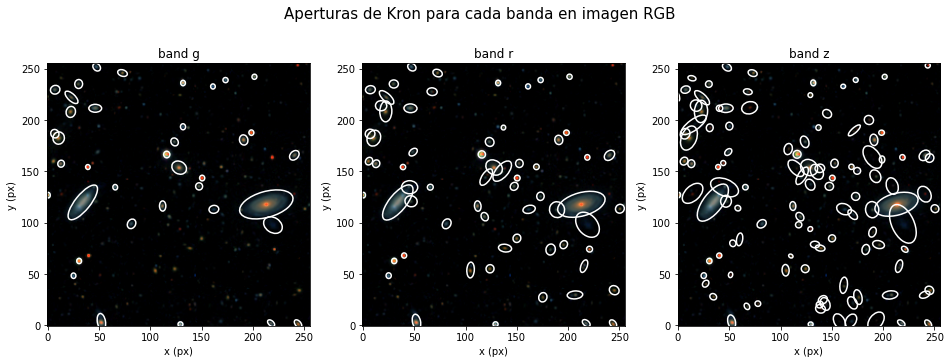

In [183]:
#Con los datos del catálogo general, graficamos las aperturas de Kron elípticas en nuestra imagen RGB.

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,12))

ax1.imshow(rgb,origin='lower')
ax2.imshow(rgb,origin='lower')
ax3.imshow(rgb,origin='lower')

ax1.set(title='band g',xlabel='x (px)',ylabel='y (px)')
ax2.set(title='band r',xlabel='x (px)',ylabel='y (px)')
ax3.set(title='band z',xlabel='x (px)',ylabel='y (px)')

fig.suptitle('Aperturas de Kron para cada banda en imagen RGB',x=0.5,y=0.72,fontsize=15)
cat_g.plot_kron_apertures(kron_params=(2.5, 1.0), ax=ax1, color='white', lw=1.5)
cat_r.plot_kron_apertures(kron_params=(2.5, 1.0), ax=ax2, color='white', lw=1.5)
cat_z.plot_kron_apertures(kron_params=(2.5, 1.0), ax=ax3, color='white', lw=1.5)
plt.show()

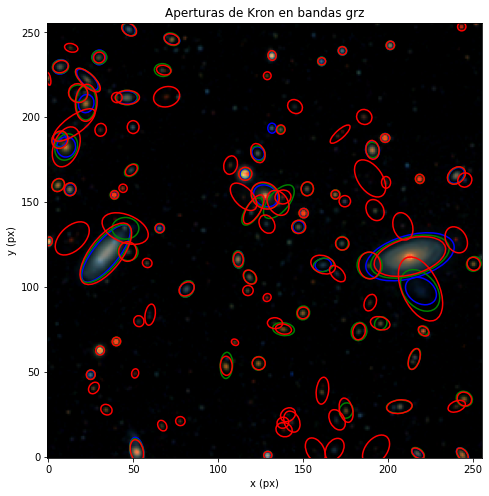

In [184]:
#Se ejecutan las aperturas de Kron en una única imagen rgb, considerando los catálogos de las bandas g, r y z, 
#diferenciadas por colores.

fig,ax = plt.subplots(1,figsize=(8,8))

ax.set(title='Aperturas de Kron en bandas grz',xlabel='x (px)',ylabel='y (px)')
ax.imshow(rgb,origin='lower')

cat_g.plot_kron_apertures(kron_params=(2.5, 1.0), ax=ax, color='blue', lw=1.5)
cat_r.plot_kron_apertures(kron_params=(2.5, 1.0), ax=ax, color='green', lw=1.5)
cat_z.plot_kron_apertures(kron_params=(2.5, 1.0), ax=ax, color='red', lw=1.5)
plt.show()

### 1.d Distribuciones de magnitud, color y tamaño de cada fuente 

In [23]:
#Hacemos uso de la columna de datos "segment_flux" del catálogo con el objetivo de definir la distribución de 
#magnitud de las bandas g, r y z.
mag_g_abs= -2.5*np.log10(tbl_g['segment_flux'])
mag_r_abs= -2.5*np.log10(tbl_r['segment_flux'])
mag_z_abs= -2.5*np.log10(tbl_z['segment_flux'])

In [24]:
#La definición de color en astronomía es la diferencia en magnitudes de dos filtros fotométricos. Para esta 
#sección, se calcula la diferencia entre las bandas g y z, cuya distancia es mayor en comparación a las 
#bandas g-r y r-z, para obtener las distribuciones de color en cada banda.
color = mag_z_abs-mag_g_abs 

In [137]:
#Para la distribución de tamaño, extraemos los datos "semimajor_sigma" de los catálogos de cada banda.
tamaño_g=tbl_g['semimajor_sigma'].value
tamaño_r=tbl_r['semimajor_sigma'].value
tamaño_z=tbl_z['semimajor_sigma'].value

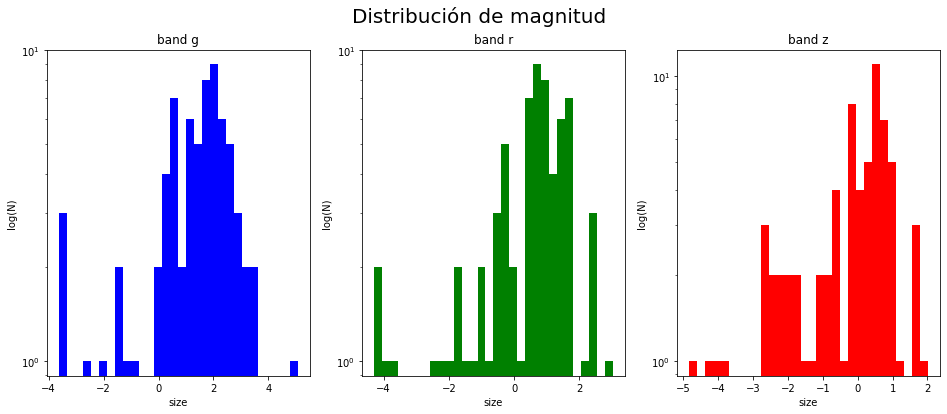

In [195]:
#Histograma de Magnitud para las fuentes detectadas en las bandas grz
fig, axes = plt.subplots(1, 3, figsize=(16,6))
fig.suptitle('Distribución de magnitud', size=20)

axes[0].hist(mag_g_abs,bins=30,color='blue',log=True)
axes[0].set(xlabel='size',ylabel='log(N)',title='band g') 
axes[1].hist(mag_r_abs,bins=30,color='green',log=True)
axes[1].set(xlabel='size',ylabel='log(N)',title='band r') 
axes[2].hist(mag_z_abs,bins=30,color='red',log=True)
axes[2].set(xlabel='size',ylabel='log(N)',title='band z') 
plt.show()

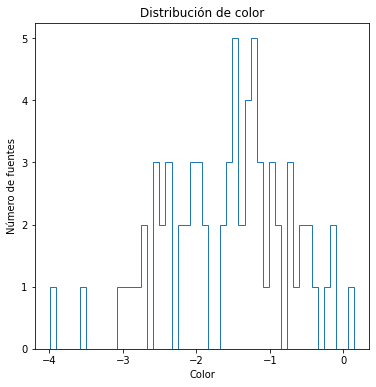

In [186]:
#Histograma de Distribución de color.
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
axes.hist(color, bins=50,histtype='step')
axes.set(xlabel='Color', ylabel='Número de fuentes', title='Distribución de color')
plt.show() 

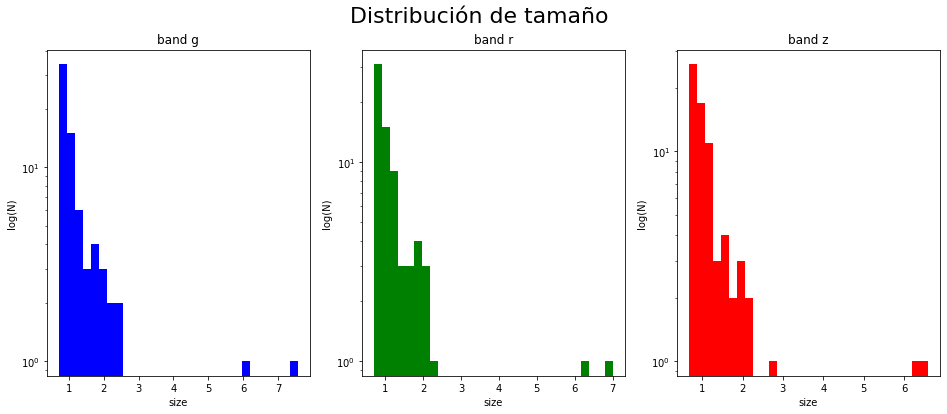

In [196]:
#Histograma de tamaño para las fuentes detectadas en las bandas grz
fig, axes = plt.subplots(1, 3, figsize=(16,6))
fig.suptitle('Distribución de tamaño', size=22)

axes[0].hist(tamaño_g,bins=30,color='blue',log=True)
axes[0].set(xlabel='size',ylabel='log(N)',title='band g') #g es azul
axes[1].hist(tamaño_r,bins=30,color='green',log=True)
axes[1].set(xlabel='size',ylabel='log(N)',title='band r') #r es verde
axes[2].hist(tamaño_z,bins=30,color='red',log=True)
axes[2].set(xlabel='size',ylabel='log(N)',title='band z') #z es rojo xd
plt.show()

### 2. Generación de isofotas y análisis de perfiles de luz

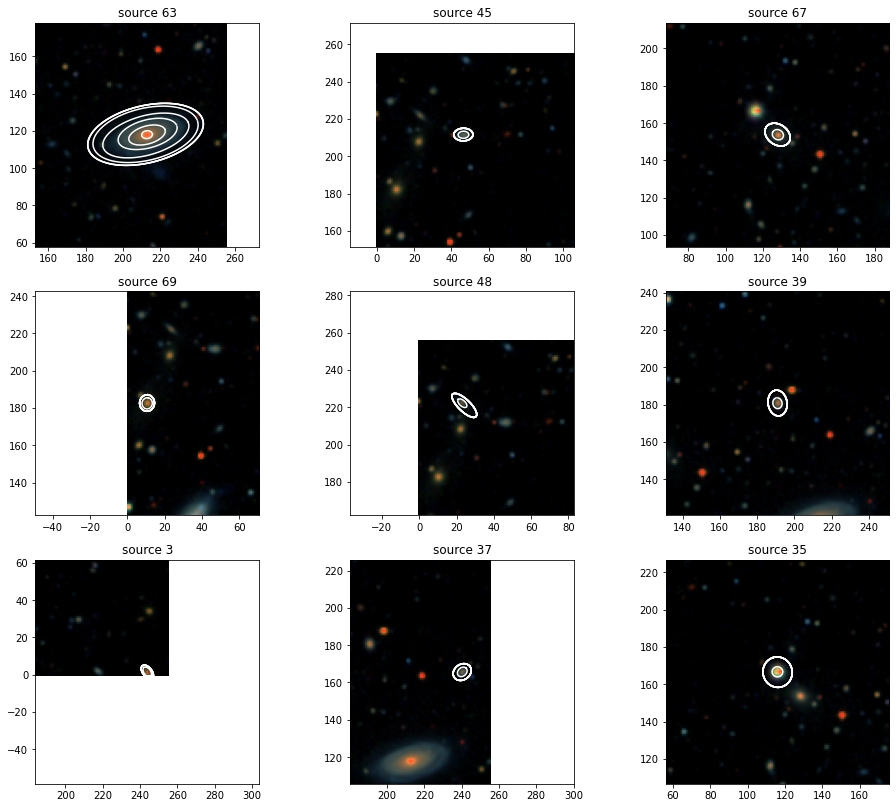

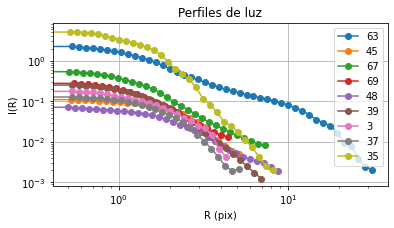

In [200]:
#Se crea un algoritmo que ubique nueve objetos del catálogo general y grafique sus isotofas.

warnings.filterwarnings("error") 
'''
Utilizaremos las advertencias de ejecución como errores, pues el ciclo try que usaremos más adelante sólo admite 
formato 'error' en su ejecución.

La función 'select_sources' identificará las fuentes según el parámetro 'semimajor_sigma' del catálogo general 
(relacionado al tamaño de las fuentes); en un arreglo cuyo orden va desde el mayor al menor valor gracias a la 
función argsort.
                                                            
'''    
select_sources = np.argsort(tbl_gral['semimajor_sigma'])[::-1] 
                                                                

max_cat = 9 #Indicamos el número de objetos que queremos detectar en el catálogo.
n = 0 #Índice que indica el número de isofotas ploteadas satisfactoriamente.
indx = 0 #Índice de ejecución. Va desde el cero hasta el ocho.


#Gráficos de Isofotas y Perfiles de Luz.

fig1, axes = plt.subplots(3, 3, figsize=(16,14)) 
axes = np.reshape(axes, -1) 
fig2,ax2 = plt.subplots(figsize=(6,3)) 


while True: 
    if n==max_cat: 
        break
    i = select_sources[indx] 
    ax = axes[n] 
    source = tbl_gral[i] 
    geometry = EllipseGeometry(x0=source['xcentroid'], y0=source['ycentroid'], 
                               sma=source['semimajor_sigma'].value,eps=source['eccentricity'].value,
                            pa=source['orientation'].value * np.pi / 180.0)
    '''
    Definimos la variable 'geometry', cuyo objetivo es generar las isofotas a través de elipses, en las cuales 
    su centro está definido por los valores 'xcentroid' e 'ycentroid' del catálogo, así como el tamaño está 
    conformado por 'semimajor_sigma', la excentricidad por el valor 'eccentricity', y el ángulo de orientación 
    por los valores de 'orientation'. 
    '''
    ellipse = Ellipse(np.mean(data, axis=0), geometry)
    
    ax.imshow(rgb, origin='lower') 
    ax.set(xlim=(source['xcentroid']-60,source['xcentroid']+60),
                ylim=(source['ycentroid']-60,source['ycentroid']+60),title=f'source {i}') #Ajuste de parámetros 
                                                                                          #para centrar las 
                                                                                          #fuentes con isofotas 
                                                                                          #de nuestra región.          
    try: 
        isolist = ellipse.fit_image() #Se genera una lista de las isofotas de nuestra fuente.
        rs = np.linspace(3,50,8) 
        n = n+1
        for j in range(len(rs)):
            x,y = isolist.get_closest(rs[j]).sampled_coordinates() #Con la función 'get_closest' se encuentra la
                                                                   #isofota más cercana a la ejecución de rs.
            ax.plot(x,y,color='white') #Gráfico de isofotas.
        ax2.plot(isolist.sma, isolist.intens, 'o-', label=i) #Gráficos de Perfiles de Luz.
        
    except:
        ax.clear()  
    indx = indx + 1 #Se re define la variable indx para comenzar un nuevo ciclo.


#Ploteo de gráficas.
ax2.set(xlabel='R (pix)', ylabel='I(R)', yscale='log', xscale='log', title='Perfiles de luz')
ax2.legend()
ax2.grid(True)

'''
Algunos bordes sin color en las gráficas son el resultado de seleccionar una fuente cercana al borde de la imagen 
escogida.
'''

plt.show()
warnings.filterwarnings("ignore")

##### Fin del código.